In [ ]:
!pip install tensorflow keras sklearn matplotlib pandas pil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
ERROR: Could not find a version that satisfies the requirement pil (from versions: none)
ERROR: No matching distribution found for pil


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/DeepLearning/Train

/content/drive/MyDrive/DeepLearning/Train


In [ ]:
os.getcwd()

'/content/drive/MyDrive/DeepLearning/Train'

In [ ]:
# loading dataset
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in os.listdir(cur_path):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (30,30), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39204, 30, 30, 3) (39204,)


In [ ]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39204, 30, 30, 3) (39204,)
(31363, 30, 30, 3) (7841, 30, 30, 3) (31363,) (7841,)


In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [ ]:
y_train.shape, y_test.shape

((31363, 43), (7841, 43))

Datasets in CSV Format

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/DeepLearning/Train.csv',usecols=['ClassId','Path','Width','Height'],)
test_data=pd.read_csv('/content/drive/MyDrive/DeepLearning/Test.csv',usecols=['ClassId','Path','Width','Height'],)

train_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)
test_data.rename({'ClassId':'label','Path':'path'},inplace=True,axis=1)

train_data.head()

,Width,Height,label,path
0,27,26,20,Train/20/00020_00000_00000.png
1,28,27,20,Train/20/00020_00000_00001.png
2,29,26,20,Train/20/00020_00000_00002.png
3,28,27,20,Train/20/00020_00000_00003.png
4,28,26,20,Train/20/00020_00000_00004.png


In [ ]:
test_data.head()

,Width,Height,label,path
0,53,54,16,Test/00000.png
1,42,45,1,Test/00001.png
2,48,52,38,Test/00002.png
3,27,29,33,Test/00003.png
4,60,57,11,Test/00004.png


In [ ]:
print('NO. of classes')
print(train_data['label'].nunique())

NO. of classes
43


In [ ]:
cd/content/drive/MyDrive/DeepLearning

/content/drive/MyDrive/DeepLearning


<ipython-input-16-428560a304b8>:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


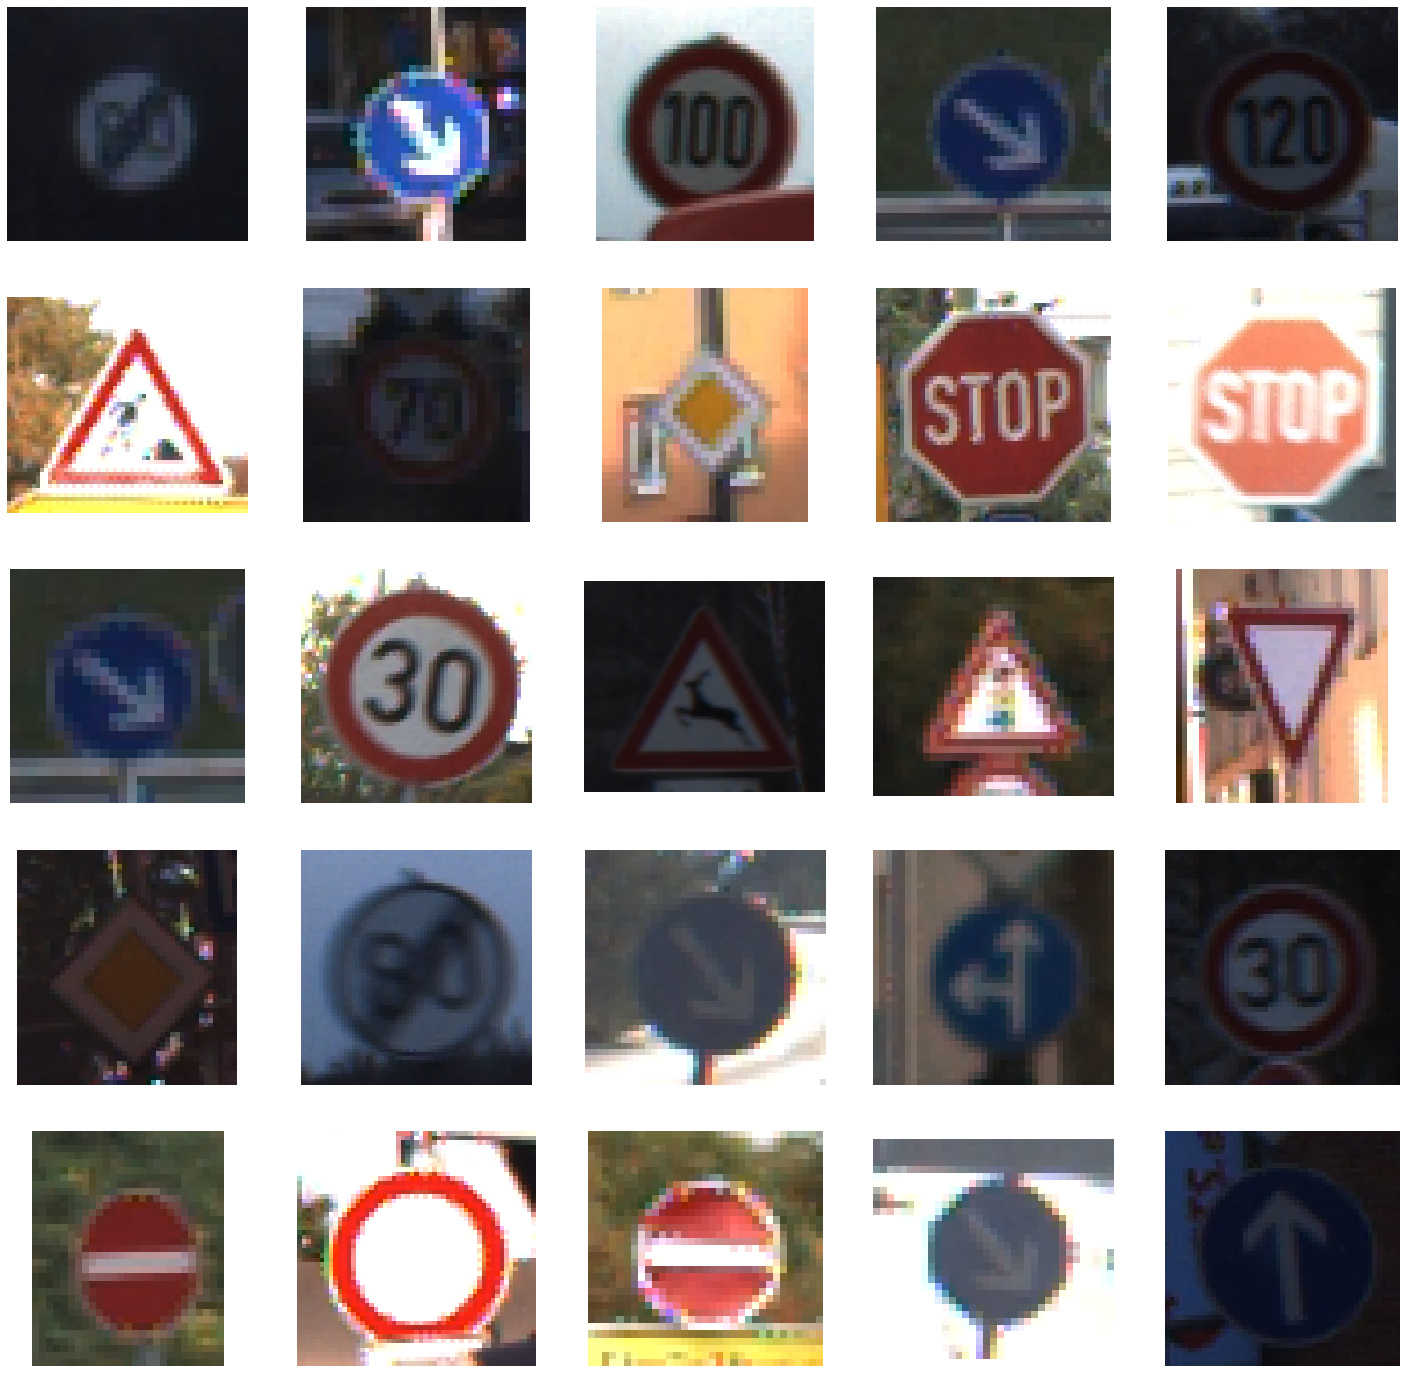

In [ ]:
import random
from matplotlib.image import imread
data_dir= os.getcwd()
imgs=test_data['path'].values
plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_image_path=data_dir+'/'+random.choice(imgs)
    random_image=imread(random_image_path)
    plt.imshow(random_image)
    plt.grid(b=None)
    plt.axis('off')
    plt.xlabel(random_image.shape[0],fontsize=20)
    plt.ylabel(random_image.shape[0],fontsize=20)

In [ ]:
cd/content/drive/MyDrive/DeepLearning/Train

/content/drive/MyDrive/DeepLearning/Train


Text(0, 0.5, 'Number of images')

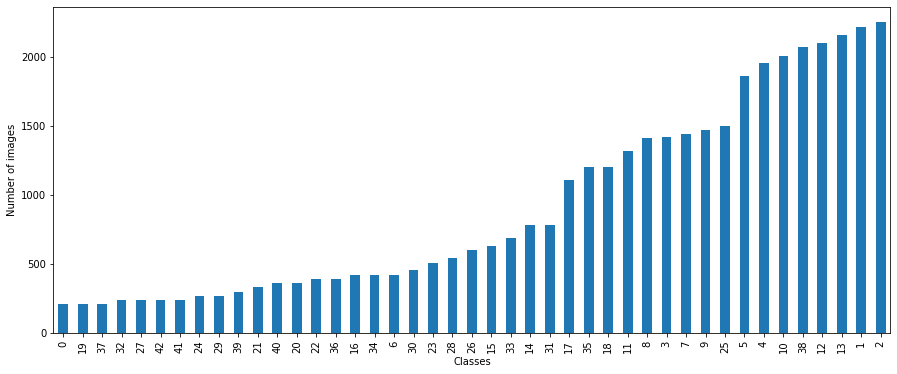

In [ ]:
# number of images in each class
data_dic = {}
for folder in os.listdir(cur_path):
    data_dic[folder] = len(os.listdir(cur_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

In [ ]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [ ]:
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 19.9 MB/s eta 0:00:00


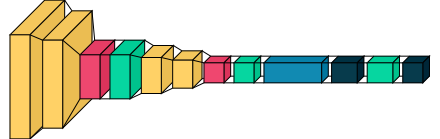

In [ ]:
visualkeras.layered_view(model)

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/20
491/491 [==============================] - 148s 296ms/step - loss: 2.4831 - accuracy: 0.4133 - val_loss: 0.9106 - val_accuracy: 0.7720
Epoch 2/20
491/491 [==============================] - 147s 299ms/step - loss: 0.9327 - accuracy: 0.7268 - val_loss: 0.3547 - val_accuracy: 0.9124
Epoch 3/20
491/491 [==============================] - 146s 297ms/step - loss: 0.5585 - accuracy: 0.8346 - val_loss: 0.1872 - val_accuracy: 0.9477
Epoch 4/20
491/491 [==============================] - 144s 293ms/step - loss: 0.4322 - accuracy: 0.8728 - val_loss: 0.1602 - val_accuracy: 0.9561
Epoch 5/20
491/491 [==============================] - 148s 301ms/step - loss: 0.3489 - accuracy: 0.8973 - val_loss: 0.1250 - val_accuracy: 0.9616
Epoch 6/20
491/491 [==============================] - 147s 300ms/step - loss: 0.3128 - accuracy: 0.9067 - val_loss: 0.1066 - val_accuracy: 0.9684
Epoch 7/20
491/491 [==============================] - 146s 297ms/step - loss: 0.2637 - accuracy: 0.9212 - val_loss: 0.0809 -

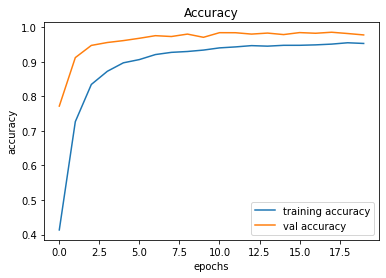

In [ ]:
#plotting graphs for accuracy 
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

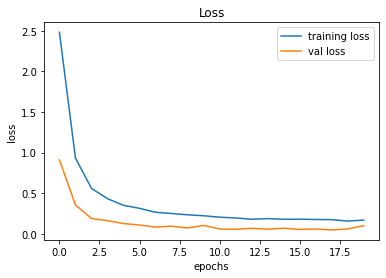

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# Score
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss', score[0])
print('Test accuracy', score[1])

Test Loss 0.09827844798564911
Test accuracy 0.9780640006065369


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

246/246 [==============================] - 10s 40ms/step


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.96      0.99      0.97       440
           2       0.99      0.94      0.97       493
           3       0.98      0.98      0.98       287
           4       0.99      0.97      0.98       381
           5       0.96      0.94      0.95       333
           6       0.96      1.00      0.98        82
           7       0.96      0.99      0.97       290
           8       0.97      0.97      0.97       277
           9       1.00      0.99      1.00       303
          10       1.00      1.00      1.00       420
          11       1.00      0.97      0.98       276
          12       0.92      0.99      0.96       389
          13       1.00      0.96      0.97       445
          14       0.99      1.00      1.00       147
          15       0.92      0.98      0.95       125
          16       1.00      0.99      0.99        87
          17       1.00    

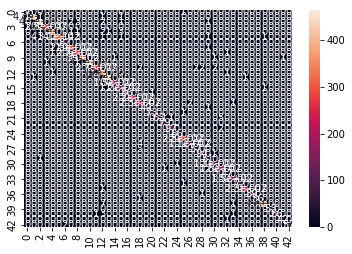

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred_class,y_test_class)
score

0.9780640224461166

In [ ]:
model.save('traffic_classifier.h5')

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')  # start it
os.environ['DISPLAY']=':1.0'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.6 [780 kB]
Fetched 780 kB in 1s (1,055 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 128213 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.6_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.6) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.6) ...
Processing triggers for man-db (2.9.1-1) ...


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [ ]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4.25),(top.winfo_height()/4.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=30,pady=10)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()